In [3]:
from sklearn.datasets import fetch_olivetti_faces

olivetti = fetch_olivetti_faces()
olivetti

{'data': array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
         0.1570248 ],
        [0.45454547, 0.47107437, 0.5123967 , ..., 0.15289256, 0.15289256,
         0.15289256],
        [0.3181818 , 0.40082645, 0.49173555, ..., 0.14049587, 0.14876033,
         0.15289256],
        ...,
        [0.5       , 0.53305787, 0.607438  , ..., 0.17768595, 0.14876033,
         0.19008264],
        [0.21487603, 0.21900827, 0.21900827, ..., 0.57438016, 0.59090906,
         0.60330576],
        [0.5165289 , 0.46280992, 0.28099173, ..., 0.35950413, 0.3553719 ,
         0.38429752]], dtype=float32),
 'images': array([[[0.30991736, 0.3677686 , 0.41735536, ..., 0.37190083,
          0.3305785 , 0.30578512],
         [0.3429752 , 0.40495867, 0.43801653, ..., 0.37190083,
          0.338843  , 0.3140496 ],
         [0.3429752 , 0.41735536, 0.45041323, ..., 0.38016528,
          0.338843  , 0.29752067],
         ...,
         [0.21487603, 0.20661157, 0.2231405 , ..., 0.15289256,
     

In [4]:
X, y = olivetti["data"], olivetti["target"]
X.shape, y.shape

((400, 4096), (400,))

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, stratify=y_test)

len(y_train), len(y_val), len(y_test)

(240, 80, 80)

fitting kmeans with 2 clusters
fitting kmeans with 3 clusters
fitting kmeans with 4 clusters
fitting kmeans with 5 clusters
fitting kmeans with 7 clusters
fitting kmeans with 8 clusters
fitting kmeans with 10 clusters
fitting kmeans with 12 clusters
fitting kmeans with 15 clusters
fitting kmeans with 20 clusters
fitting kmeans with 30 clusters
fitting kmeans with 40 clusters
fitting kmeans with 50 clusters


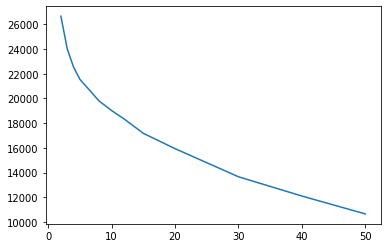

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertias = []
n_clusters = [2, 3, 4, 5, 7, 8, 10, 12, 15, 20, 30, 40, 50]

for k in n_clusters:
    print("fitting kmeans with " + str(k) + " clusters")
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)
    
plt.plot(n_clusters, inertias)
plt.show()

fitting kmeans with 2 clusters
fitting kmeans with 3 clusters
fitting kmeans with 4 clusters
fitting kmeans with 5 clusters
fitting kmeans with 6 clusters
fitting kmeans with 7 clusters
fitting kmeans with 8 clusters
fitting kmeans with 9 clusters
fitting kmeans with 10 clusters
fitting kmeans with 11 clusters
fitting kmeans with 12 clusters


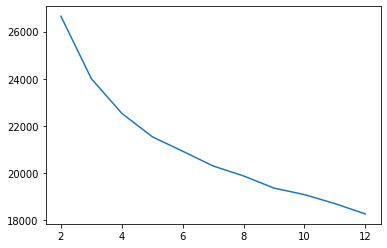

In [20]:
inertias = []
n_clusters = range(2,13)

for k in n_clusters:
    print("fitting kmeans with " + str(k) + " clusters")
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)
    
plt.plot(n_clusters, inertias)
plt.show()

In [23]:
N_CLUSTERS = 5

kmeans = KMeans(n_clusters=N_CLUSTERS)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

label #0


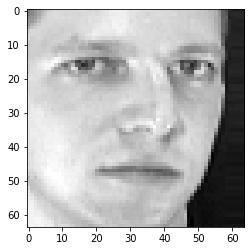

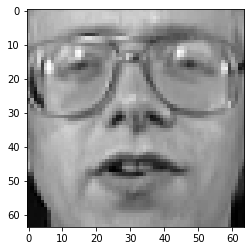

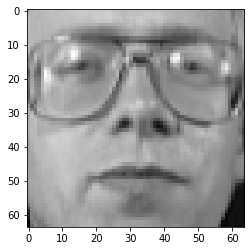

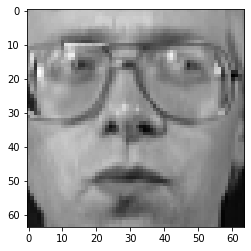

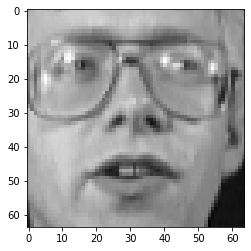

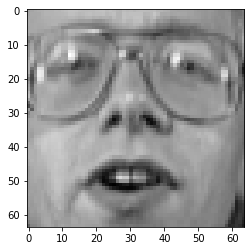

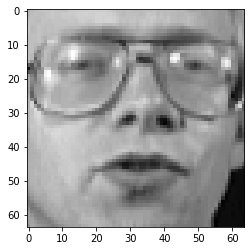

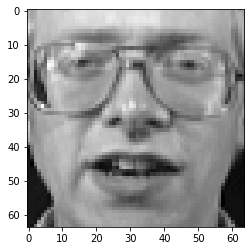

label #1


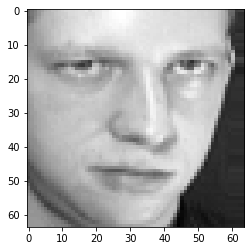

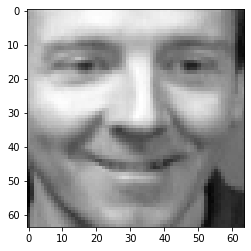

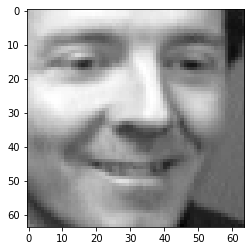

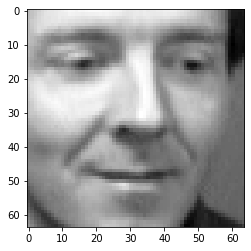

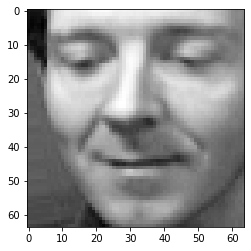

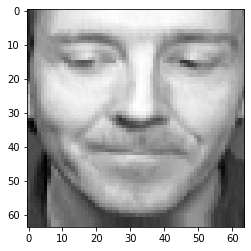

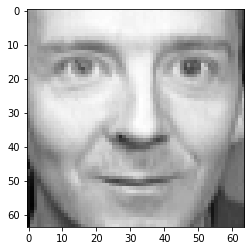

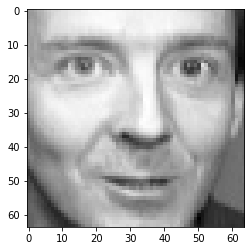

label #2


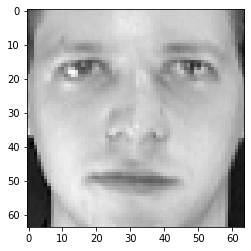

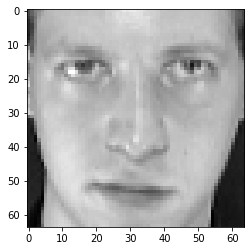

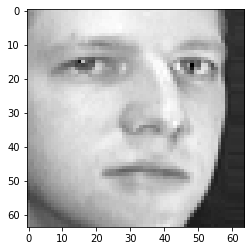

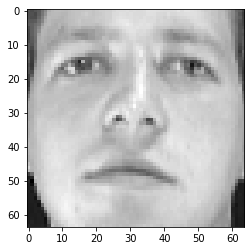

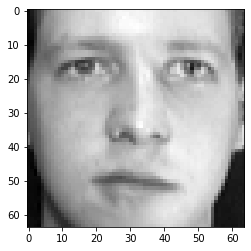

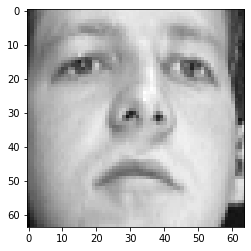

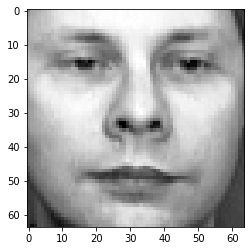

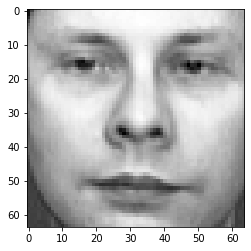

label #3


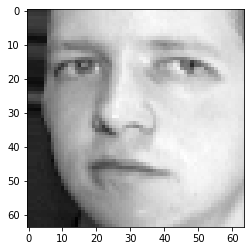

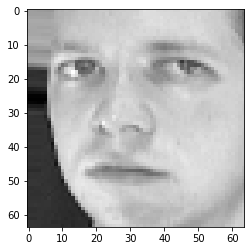

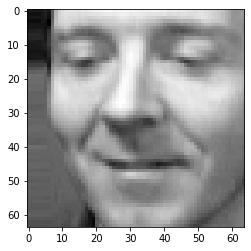

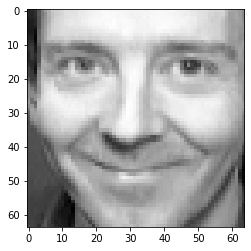

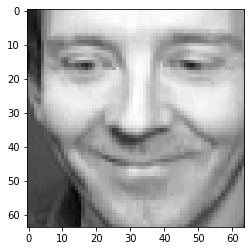

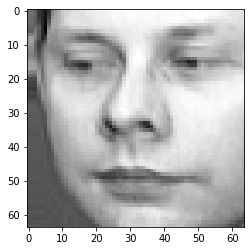

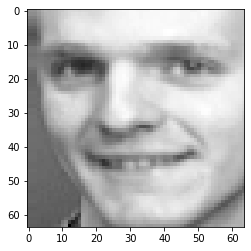

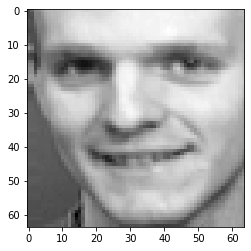

label #4


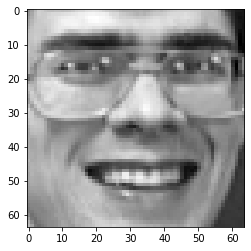

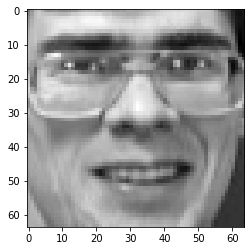

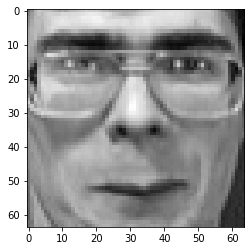

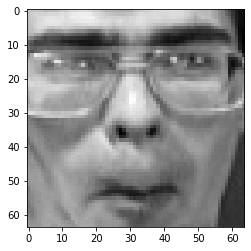

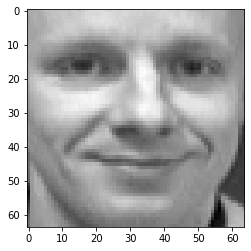

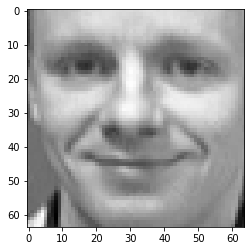

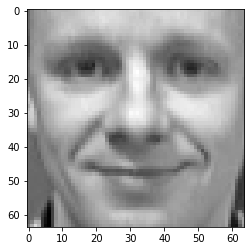

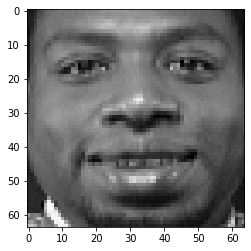

In [25]:
images = olivetti["images"]
for label in range(N_CLUSTERS):
    print("label #" + str(label))
    label_images = images[kmeans.labels_ == label, ...]
    for pic in range(8):
        plt.imshow(label_images[pic,...], cmap='gray')
        plt.show()

In [28]:
# ex 11
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier()
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [29]:
from sklearn.metrics import accuracy_score

accuracy_score(y_val, rnd_clf.predict(X_val))

0.9125

In [31]:
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline([
    ("kmeans", KMeans()),
    ("rf", RandomForestClassifier())
])

In [45]:
param_grid = dict(kmeans__n_clusters=range(92, 99, 1))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 7 candidates, totalling 21 fits
[CV] kmeans__n_clusters=92 ...........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................ kmeans__n_clusters=92, total=   6.3s
[CV] kmeans__n_clusters=92 ...........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.3s remaining:    0.0s


[CV] ............................ kmeans__n_clusters=92, total=   6.2s
[CV] kmeans__n_clusters=92 ...........................................
[CV] ............................ kmeans__n_clusters=92, total=   6.2s
[CV] kmeans__n_clusters=93 ...........................................
[CV] ............................ kmeans__n_clusters=93, total=   6.1s
[CV] kmeans__n_clusters=93 ...........................................
[CV] ............................ kmeans__n_clusters=93, total=   6.1s
[CV] kmeans__n_clusters=93 ...........................................
[CV] ............................ kmeans__n_clusters=93, total=   6.4s
[CV] kmeans__n_clusters=94 ...........................................
[CV] ............................ kmeans__n_clusters=94, total=   6.2s
[CV] kmeans__n_clusters=94 ...........................................
[CV] ............................ kmeans__n_clusters=94, total=   6.4s
[CV] kmeans__n_clusters=94 ...........................................
[CV] .

[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:  2.2min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('kmeans',
                                        KMeans(algorithm='auto', copy_x=True,
                                               init='k-means++', max_iter=300,
                                               n_clusters=8, n_init=10,
                                               n_jobs=None,
                                               precompute_distances='auto',
                                               random_state=None, tol=0.0001,
                                               verbose=0)),
                                       ('rf',
                                        RandomForestClassifier(bootstrap=True,
                                                               ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',


In [46]:
grid_clf.best_params_

{'kmeans__n_clusters': 98}

In [47]:
N_CLUSTERS = 98
kmeans = KMeans(n_clusters=N_CLUSTERS)
X_train_reduced = kmeans.fit_transform(X_train)
X_val_reduced = kmeans.transform(X_val)

rnd_clf = RandomForestClassifier()
rnd_clf.fit(X_train_reduced, y_train)

accuracy_score(y_val, rnd_clf.predict(X_val_reduced))

0.825

In [49]:
import numpy as np

X_train_concat = np.c_[X_train, X_train_reduced]
X_val_concat = np.c_[X_val, X_val_reduced]

rnd_clf = RandomForestClassifier()
rnd_clf.fit(X_train_concat, y_train)

accuracy_score(y_val, rnd_clf.predict(X_val_concat))

0.925

In [50]:
# final test prediciton
X_test_concat = np.c_[X_test, kmeans.transform(X_test)]

accuracy_score(y_test, rnd_clf.predict(X_test_concat))

0.9375

In [68]:
# ex 12
from sklearn.decomposition import PCA

pca = PCA(n_components=0.99)

X_pca = pca.fit_transform(X)

In [69]:
X_pca.shape

(400, 260)

In [79]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components = 30, n_init=10)
gm.fit(X_pca)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=30, n_init=10,
                precisions_init=None, random_state=None, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

In [81]:
X_new_pca, _= gm.sample(10)
X_new = pca.inverse_transform(X_new_pca)

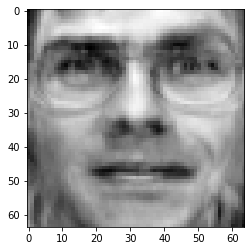

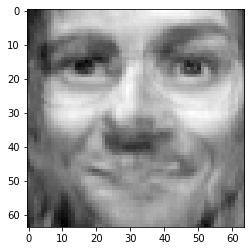

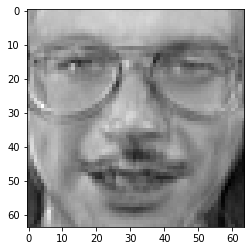

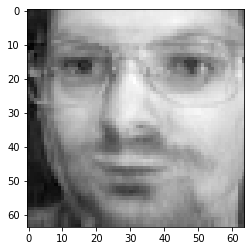

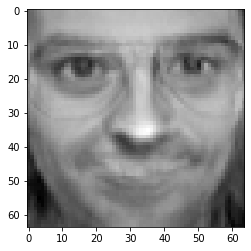

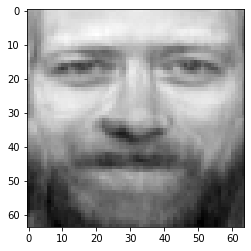

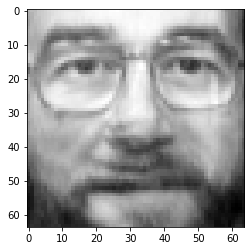

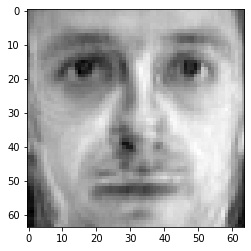

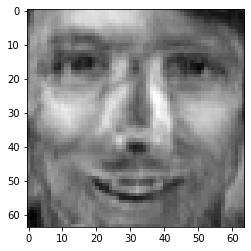

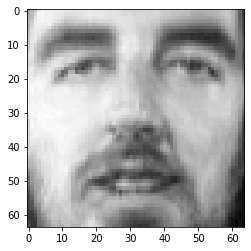

In [82]:
import matplotlib.pyplot as plt
%matplotlib inline

for image in X_new:
    plt.imshow(image.reshape((64,64)), cmap="gray")
    plt.show()